# What is "Sismoavalanche"?

Sismoavalanche is a project that aims to explore and study the collapse dynamics of dense granular landslides, such as debris, snow, or rock avalanches.

**Challenges and objectives of this project:**

We know that avalanches, when they collapse, generate seismic signals that can be detected by seismometers. In this study, the seismic characteristics of these signals will be extracted to determine if they can be used to identify the morphometric characteristics of avalanches, such as travel distance (runout), volume, or fall height of the event.

Accomplishing the objective of this study can avoid deploying extensive resources to measure morphometric characteristics. In fact, it is more expensive to send a team of experts into the field to measure an avalanche than to analyze the event using seismology.

Automating this approach would also allow for the automatic and abundant filling of existing data catalogs, enabling studies on a large number of events.

## In this study, we will use the database Exotic Seismic Events Catalog (ESEC) : https://ds.iris.edu/spud/esec

First, let's load it :

In [1]:
#Librairies
import matplotlib.pyplot as plt
import pandas as pd

#Handmade librairies
import catalog
import figures
import histograms

#Display parameters
catalog.display_params_for_catalog()

In [2]:
#Load ESEC
ESEC = pd.read_csv("catalog/0_ESEC.txt", delimiter="|") 

## Now, let's open the catalog :

Number of columns in ESEC : 56
Number of landslides in ESEC : 290


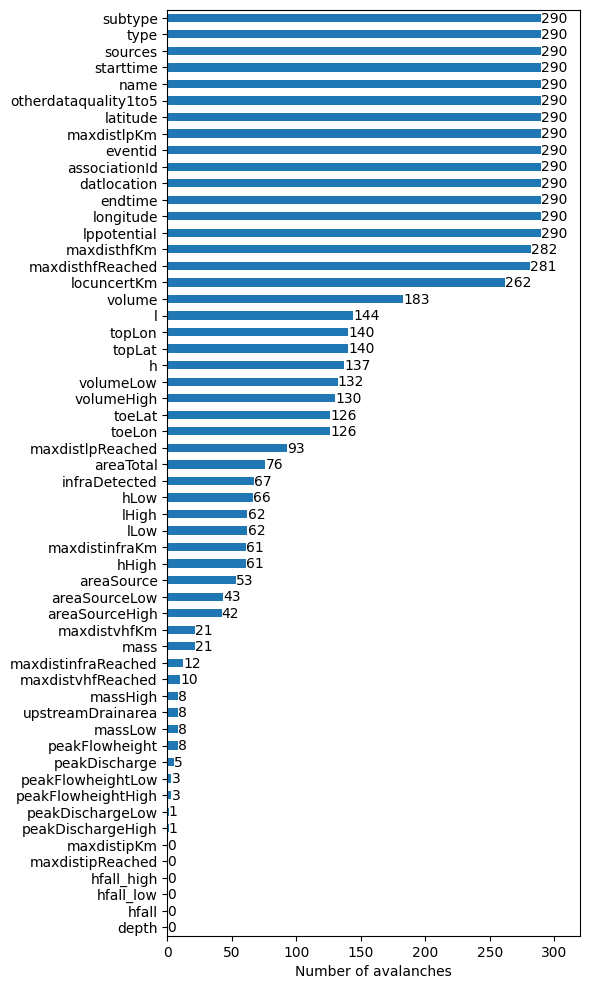

In [3]:
print("Number of columns in ESEC :", len(ESEC.columns))
print("Number of landslides in ESEC :", len(ESEC))

histograms.open_catalog(ESEC, pos_number=0.260, xlim=320)

#save the figure
figures.save("figures/ESEC_inspection.pdf")

## There are 290 events in ESEC. But, all the events are not avalanches. Let's see that :

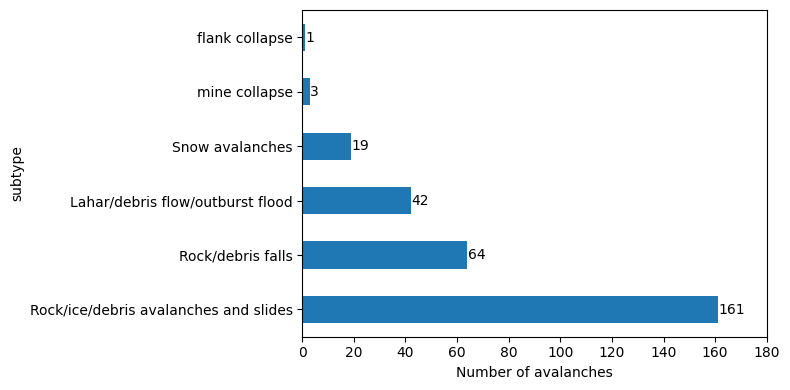

In [4]:
plt.figure(figsize=(8,4))

histograms.see_word_distribution(ESEC["subtype"], pos_number=0.08, xlim=180)

figures.save("figures/ESEC_subtype.pdf", tight_layout=True)

In [5]:
#Keep only ESEC columns that contain the word "avalanche" in "subtype"
ESEC_avalanches = ESEC[ESEC["subtype"].str.contains("avalanche")]

#Print the number of avalanches in ESEC
print("There are " + str(len(ESEC_avalanches[ESEC_avalanches["subtype"] == "Snow avalanches"]) + len(ESEC_avalanches[ESEC_avalanches["subtype"] == "Rock/ice/debris avalanches and slides"])) + " avalanches in ESEC")

There are 180 avalanches in ESEC


## As a reminder, we want to work only on avalanches. So, we will work with the 180 avalanches in ESEC.

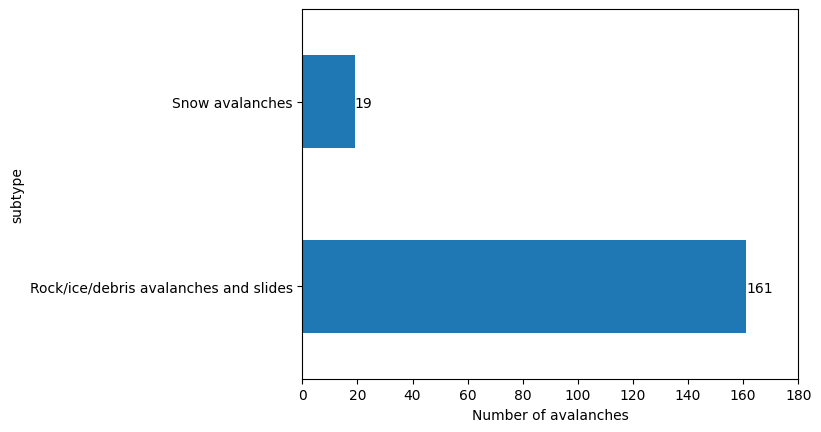

In [6]:
histograms.see_word_distribution(ESEC_avalanches["subtype"], pos_number=0.03, xlim=180)

ESEC_avalanches = ESEC_avalanches.reset_index(drop=True) #To reset all avalanche indexes and end at 180 events
ESEC_avalanches.to_pickle("catalog/1_ESEC_avalanches_180.pickle") #save the new catalog